<a href="https://colab.research.google.com/github/rjy1022/my_assets/blob/main/Dimensionality_Reduction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this exercise, we will explore how dimensionality reduction works when applied to some real data.  As always, all questions to be answered will be in <font color="blue"> blue</font> and places to write your answers will be in <font color="green"> green</font>.  Work on this section after finishing the previous notebook, and Sean and I will be moving through the breakout rooms to help.

###Import Useful Modules

In [ ]:
#import various useful packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
import pandas as pd
%matplotlib inline

#importing dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import MDS
from sklearn.manifold import Isomap 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
import umap

#importing clustering packages
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

###Spike Sorting
Spike sorting is a common (and annoying) problem in electrophysiological data, where spikes from multiple neurons appear on a single electrode and one wishes to assign each spike to its associated neuron.  This problem will deal with an example neural data set taken by Prof. Samuel Sober in the Emory Biology Department.

To start, we will import the data into the notebook as an an $N\times d$ matrix, where each row is a different voltage recording from an electrical channel during a spike, and each column is a different time point.  Time is increasing with along the columns, with each column representing a time increase of 1ms (t=0,1,...,33 ms), and the units of the electrical voltages are in $\mu V$.  There are 3636 different recordings here.

In [ ]:
url = 'https://raw.githubusercontent.com/gordonberman/bioqtm385_fall2020/master/data/spike_data.csv'
spike_data_df = pd.read_csv(url,header=None)
spike_data = spike_data_df.to_numpy()
np.shape(spike_data)

(3636, 34)

<font color="pink">Question #1: Plot 50 randomly-chosen spike waveforms (i.e., rows) from the data.  How many different 'types' of spike patterns do you see?</font>

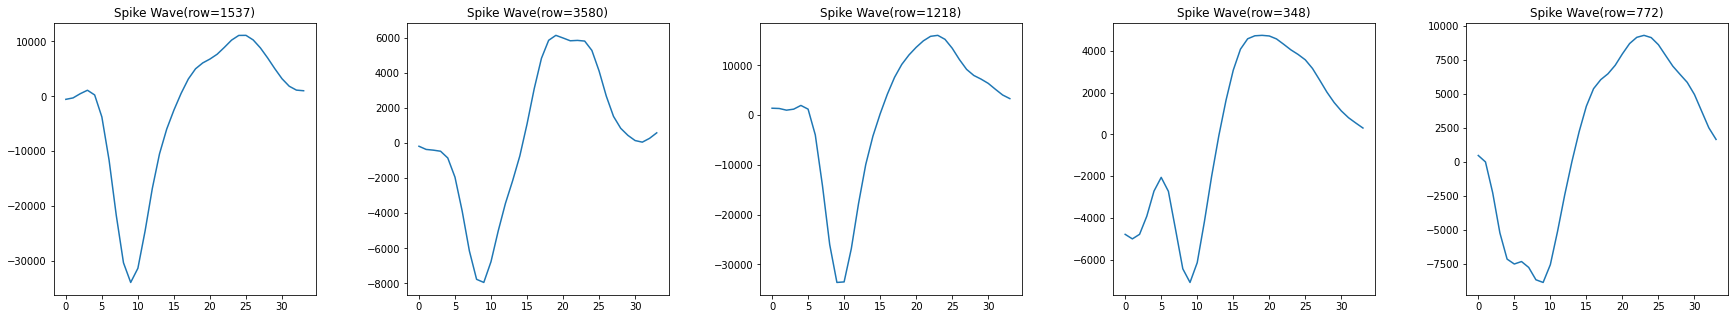

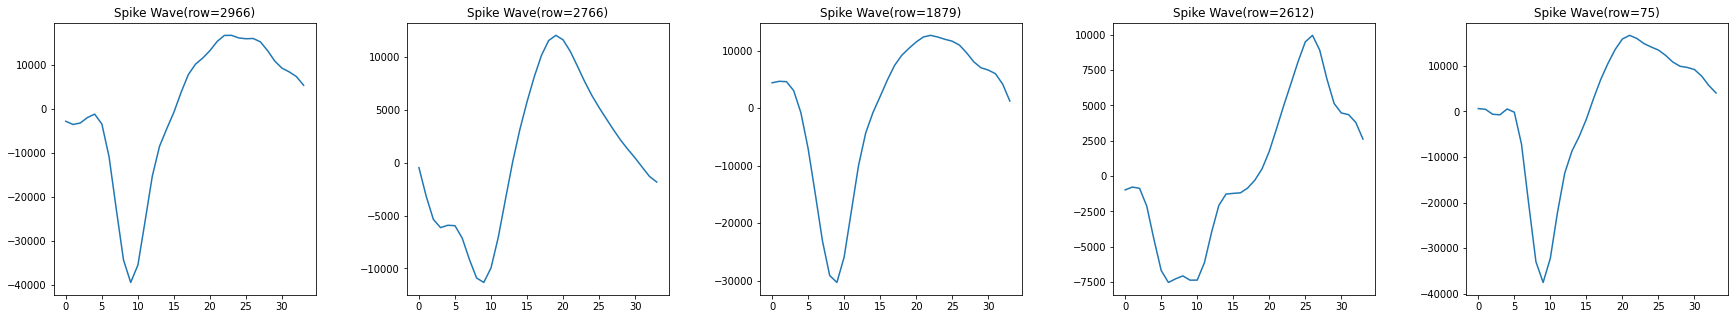

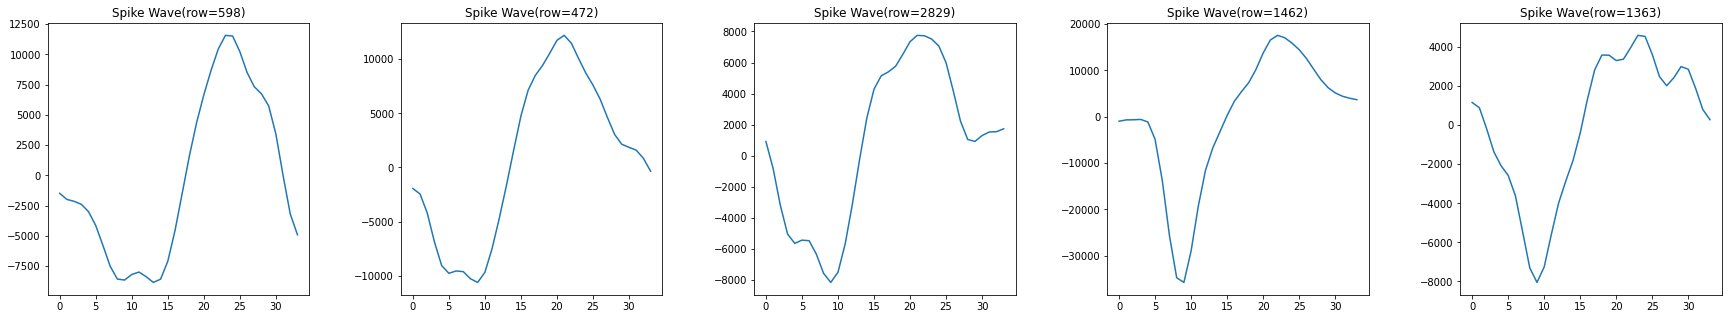

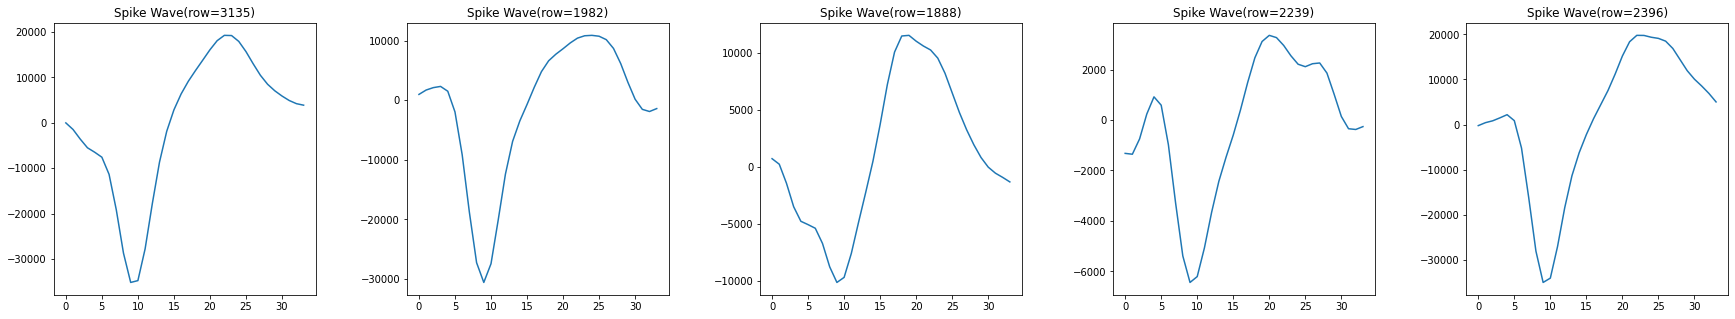

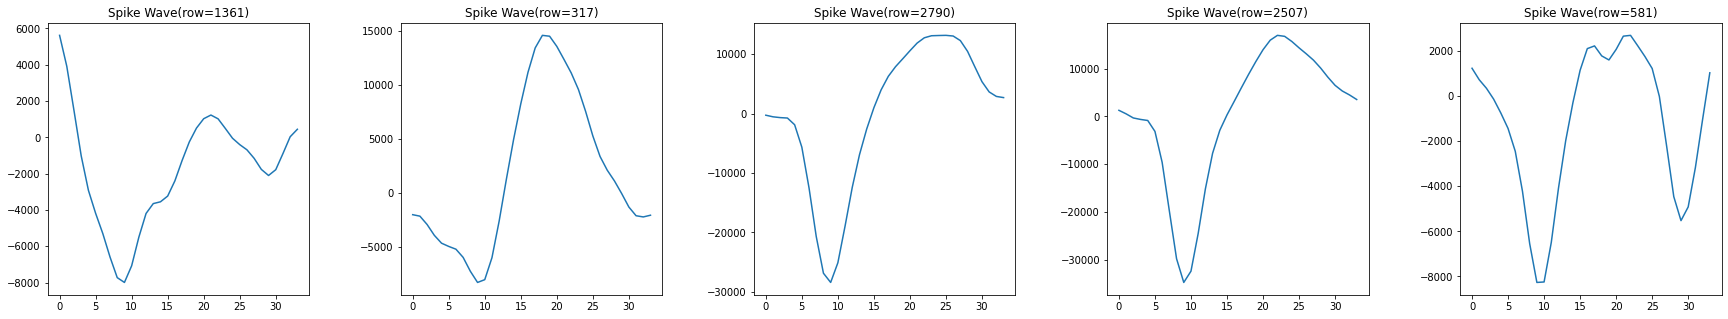

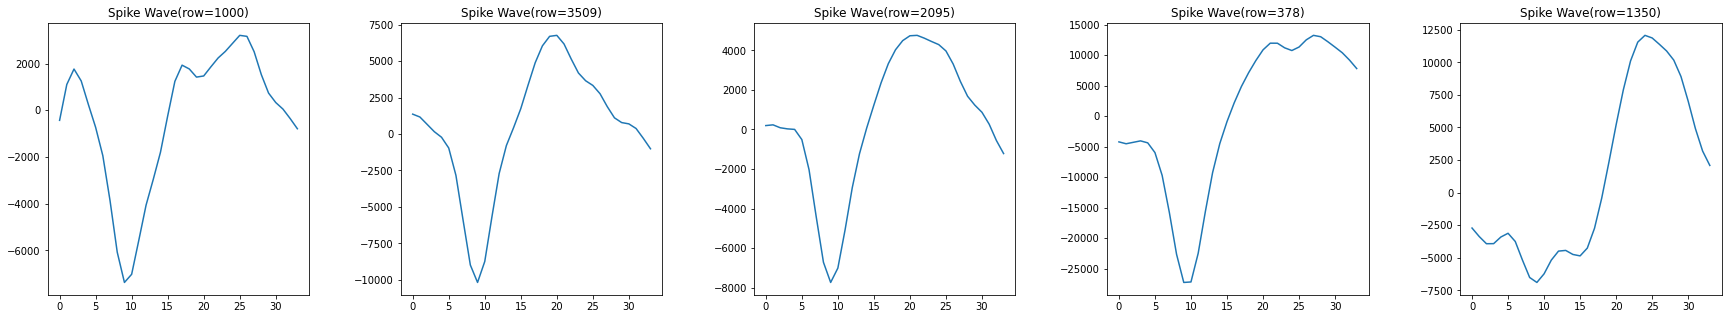

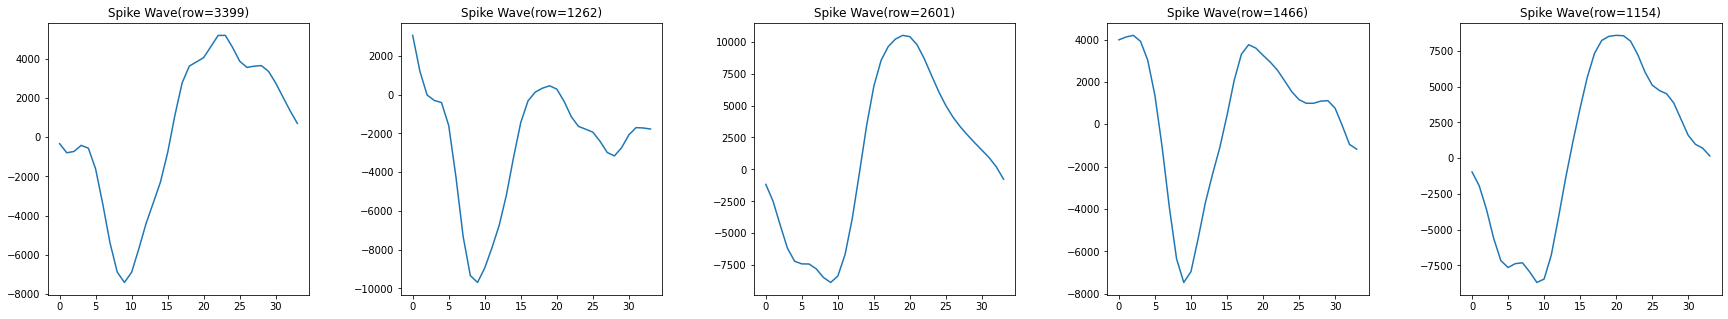

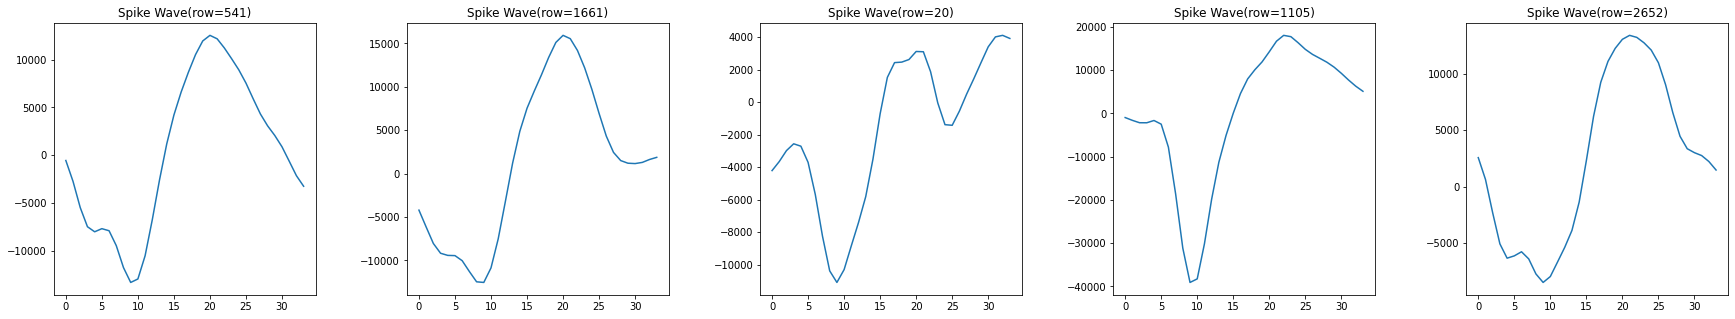

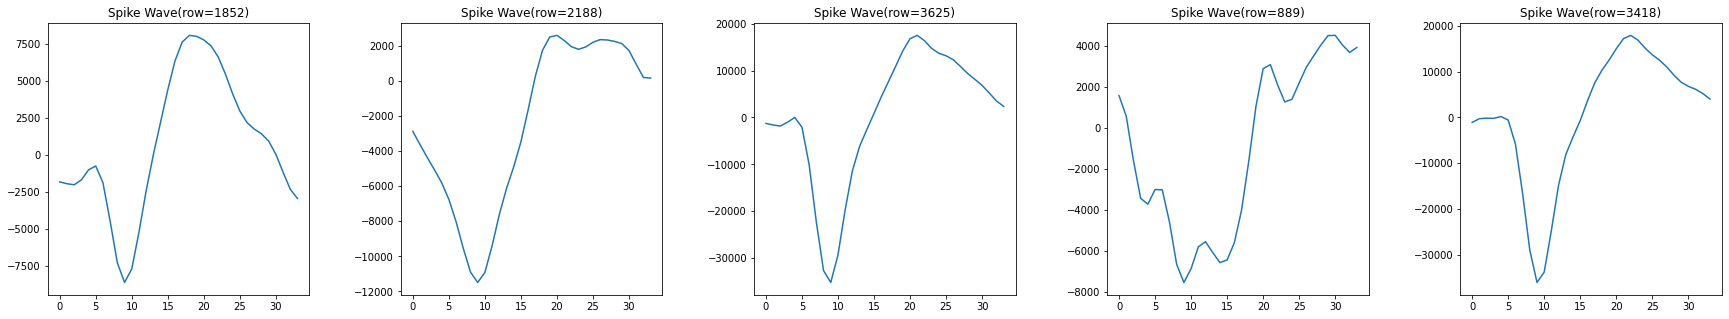

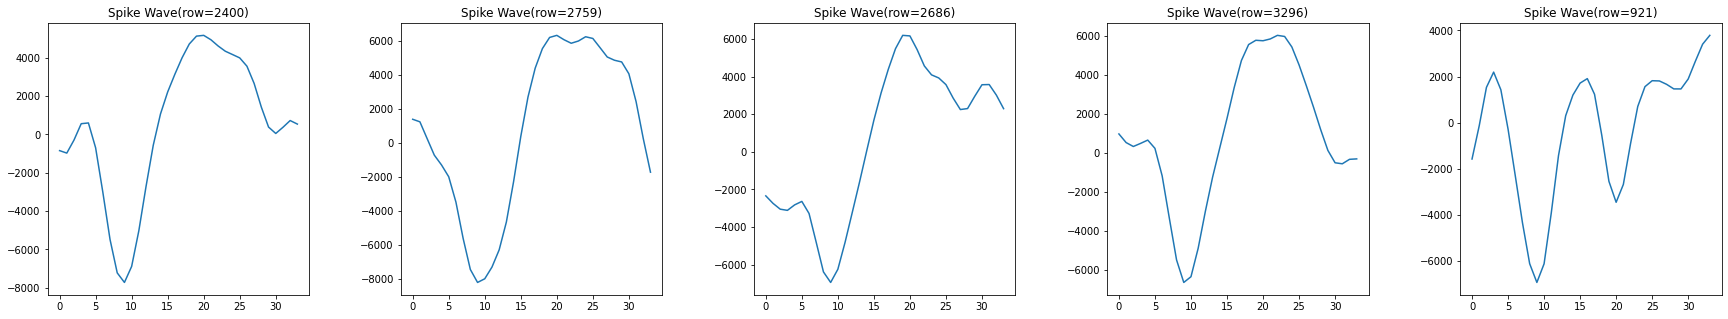

In [ ]:
import random
for num in range(10):
    fig,axs = plt.subplots(1,5,figsize=(30,5))
    plt.subplots_adjust(wspace = 0.35, hspace = 0.25)

    i = random.randrange(1,3636)
    axs[0].set_title("Spike Wave(row=%d)"%i)
    axs[0].plot(spike_data[i])

    i = random.randrange(1,3636)
    axs[1].set_title("Spike Wave(row=%d)"%i)
    axs[1].plot(spike_data[i])

    i = random.randrange(1,3636)
    axs[2].set_title("Spike Wave(row=%d)"%i)
    axs[2].plot(spike_data[i])

    i = random.randrange(1,3636)
    axs[3].set_title("Spike Wave(row=%d)"%i)
    axs[3].plot(spike_data[i])

    i = random.randrange(1,3636)
    axs[4].set_title("Spike Wave(row=%d)"%i)
    axs[4].plot(spike_data[i])


<font color="green">How many different 'types' of spike patterns do you see?</font>

<font color="pink"> Question #2: In general, each 'type' of spike likely corresponds to a different neuron.  Using all of the dimensionality reduction and clustering techniques you know so far (or others that you happen to know or look up): </font> 

<font color="pink"> a) determine how many neurons are in your data set</font> 

<font color="pink"> and </font> 

<font color="pink"> b) assign each recording to the appropriate neuron </font> 

<font color="pink"> Use plots and quantitative evidence to back-up your assertions. </font> 


In [ ]:
spike_data.shape

(3636, 34)

In [ ]:
pca = PCA()
X = pca.fit_transform(spike_data)
print(X.shape)
pca_eigenvalues = pca.explained_variance_
pca_relative_variance = pca.explained_variance_ratio_

(3636, 34)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


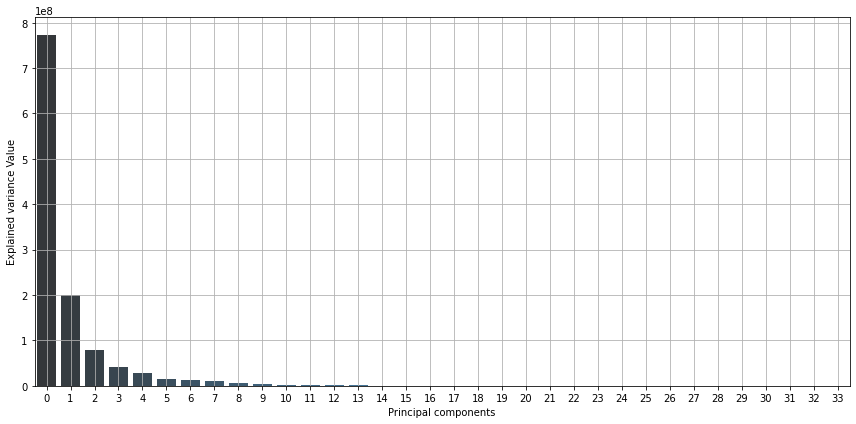

In [ ]:
# PCA Components - Barplot
plt.figure(figsize=(12,6))
sns.barplot(x=list(range(len(pca_eigenvalues))), y=pca_eigenvalues, palette="Blues_d")
plt.ylabel('Explained variance Value')
plt.xlabel('Principal components')
plt.grid(True)
plt.tight_layout()

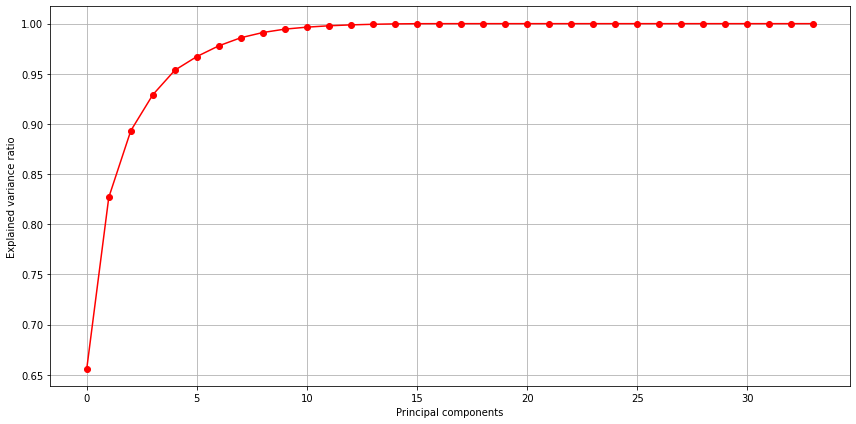

In [ ]:
# PCA Components Ratio - plot
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca_relative_variance), 'ro-')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.grid(True)
plt.tight_layout()

- Components 0~4가 data의 95% 이상을 설명한다.
- 특히, Components 0,1 두개가 80%이상을 설명한다.

In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(spike_data)
print(X.shape)
pca_eigenvalues = pca.explained_variance_
pca_relative_variance = pca.explained_variance_ratio_

(3636, 2)


In [ ]:
pca_eigenvalues

array([7.73049838e+08, 2.01053531e+08])

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

NameError: ignored

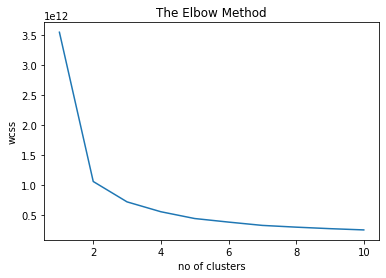

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

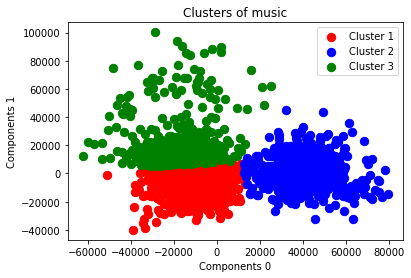

In [ ]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of music')
plt.xlabel('Components 0')
plt.ylabel('Components 1')
plt.legend()
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

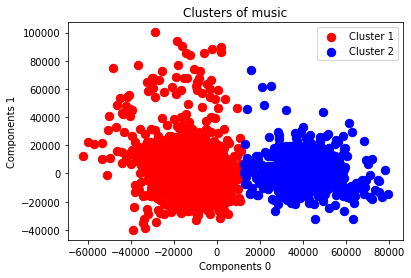

In [ ]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of music')
plt.xlabel('Components 0')
plt.ylabel('Components 1')
plt.legend()
plt.show()

In [ ]:
pca = PCA(n_components=3)
X = pca.fit_transform(spike_data)
print(X.shape)
pca_eigenvalues = pca.explained_variance_
pca_relative_variance = pca.explained_variance_ratio_

(3636, 3)


In [ ]:
pca_eigenvalues

array([7.73049838e+08, 2.01053531e+08, 7.82591910e+07])

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

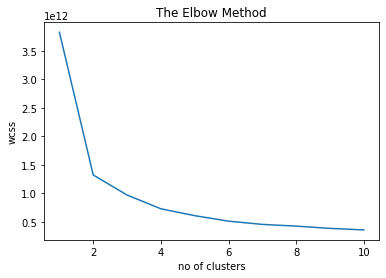

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

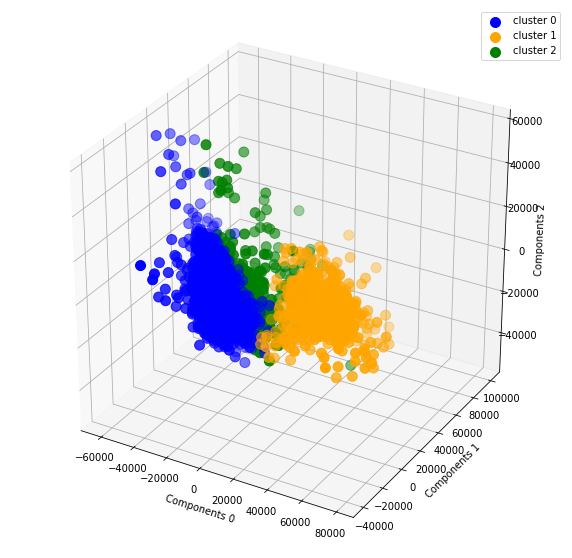

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],X[y_kmeans == 0,2], s = 100 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],X[y_kmeans == 1,2], s = 100 , color = 'orange', label = "cluster 1")
ax.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],X[y_kmeans == 2,2], s = 100 , color = 'green', label = "cluster 2")
#ax.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],X[y_kmeans == 3,2], s = 70 , color = '#D12B60', label = "cluster 3")
#ax.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],X[y_kmeans == 4,2], s = 70 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Components 0')
ax.set_ylabel('Components 1')
ax.set_zlabel('Components 2')
ax.legend()
plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
trace = go.Scatter3d(x=X[:, 0], 
                     y=X[:, 1], 
                     z=X[:, 2],
                     mode='markers',
                     marker=dict(
                         size=2.5,
                         color=y_kmeans,
                         colorscale='Viridis',   
                         opacity=0.8)
                    )
layout=go.Layout(title='Clustering(k=3)',
                 scene=dict(
                         xaxis=dict(title='Components 0'),
                         yaxis=dict(title='Components 1'),
                         zaxis=dict(title='Components 2'))
                 )
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [ ]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

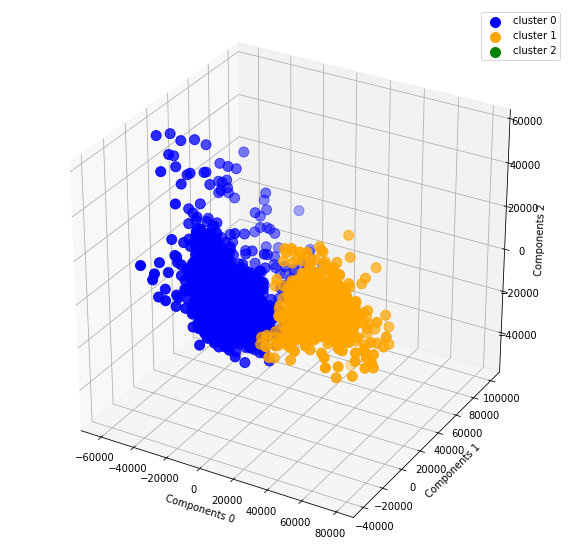

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],X[y_kmeans == 0,2], s = 100 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],X[y_kmeans == 1,2], s = 100 , color = 'orange', label = "cluster 1")
ax.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],X[y_kmeans == 2,2], s = 100 , color = 'green', label = "cluster 2")

ax.set_xlabel('Components 0')
ax.set_ylabel('Components 1')
ax.set_zlabel('Components 2')
ax.legend()
plt.show()

In [ ]:
trace = go.Scatter3d(x=X[:, 0], 
                     y=X[:, 1], 
                     z=X[:, 2],
                     mode='markers',
                     marker=dict(
                         size=2.5,
                         color=y_kmeans,
                         colorscale='Viridis',   
                         opacity=0.8)
                    )
layout=go.Layout(title='Clustering(k=2)',
                 scene=dict(
                         xaxis=dict(title='Components 0'),
                         yaxis=dict(title='Components 1'),
                         zaxis=dict(title='Components 2'))
                 )
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

<font color="green"> Type reasoning for Question #2 here